In [201]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
from scipy import stats
import math 
import statistics 
from scipy.integrate import quad
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import chi2, t, f, norm
import pandas as pd 

## a) Найти уравнение линейной регрессии: 𝜔 = a𝜉 + b𝜂

In [565]:
ksi = np.array([1,0,1])[:,np.newaxis]
eta = np.array([0,1,1])[:,np.newaxis]
omega = np.array([1,5,2])[:,np.newaxis]
data = np.array([[1,0,1],[0,1,1],[1,5,2]]).T
psi = data[:,0:2] #np.concatenate((np.ones(3)[:,np.newaxis], data[:,0:2]), axis=1)
Y = data[:,2][:,np.newaxis]
F = psi.T@psi
F_inv = np.linalg.inv(F)
beta = F_inv@psi.T@Y
print(f"𝜔 = {beta[0,0]:.2f}𝜉 + {beta[1,0]:.2f}𝜂 - уравнение линейной регрессии") 

𝜔 = -0.33𝜉 + 3.67𝜂 - уравнение линейной регрессии


## б) Найти уравнение ridge регрессии: 𝜔 = a𝜉 + b𝜂, построить график CVSS и определить значение параметра регуляризации

In [567]:
H = np.linspace(0.5,4,100)
A = np.linspace(-1,1,100)
B = np.linspace(2,4,100)
L = 0
optim_param = [0,0,0]
optim_param_a = 0
optim_param_b = 0
CVSS = []
N = 3

In [569]:
CV_array = np.array([])
CVSS =[]
for h in H:
    for i in range(N):
        data_h = np.delete(data, i, axis=0)
        Y_h = np.delete(Y, i, axis = 0)
        psi_h = np.delete(psi, i,axis = 0)

        F_h = psi_h.T @ psi_h + h * np.eye(2)
        F_1_h = np.linalg.inv(F_h)
        beta_h = F_1_h @ psi_h.T @ Y_h
        CV_array = np.append(CV_array, (psi[i][:,np.newaxis].T@beta_h - Y[i])**2)
    CVSS.append(np.sum(CV_array))
    CV_array = []

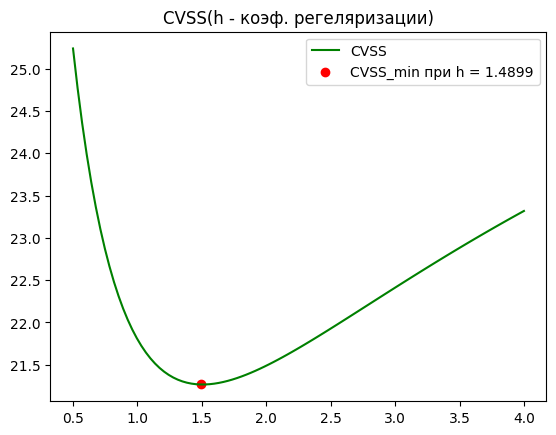

In [570]:
CVSS_min = np.min(CVSS)
h_min = H[np.where(CVSS == CVSS_min)]
plt.figure()
plt.title('CVSS(h - коэф. регeляризации)')
plt.plot(H,CVSS, color = 'g', label = 'CVSS')
plt.scatter(h_min, CVSS_min, color = 'r', label = f'CVSS_min при h = {float(h_min):.4f}')
plt.legend()
h_min = float(h_min)

In [571]:
F = psi.T @ psi + h_min * np.eye(2)
F_1 = np.linalg.inv(F)
beta = F_1 @ psi.T @ Y
print(beta)

[[0.31036536]
 [1.91685623]]


In [541]:
print(f"𝜔 = {beta[0,0]:.2f}𝜉 + {beta[1,0]:.2f}𝜂 - уравнение ridge регрессии") 

𝜔 = 0.31𝜉 + 1.92𝜂 - уравнение ridge регрессии


## в) Найти уравнение lasso регрессии: 𝜔 = a𝜉 + b𝜂, построить график CVSS и определить значение параметра регуляризации

In [552]:
H = np.linspace(0.5,4,50)
A = np.linspace(-1,5,100)
B = np.linspace(1,5,100)
L = 0
optim_param = [0,0,0]
optim_param_a = 0
optim_param_b = 0
CVSS = []
N = 3

In [553]:
CV_array = np.array([])
CVSS =[]
L_min = np.inf
a_opt = 0
b_opt = 0
h_min = 0
L_ = []
for h in H:
    for i in range(N):
        data_h = np.delete(data, i, axis=0)
        Y_h = np.delete(Y, i, axis = 0)
        psi_h = np.delete(psi, i,axis = 0)

        #нахождение коэф регрессии 
        for a in A:
            for b in B:
                L = (a * psi_h[:,0][:,np.newaxis] + b * psi_h[:,1][:,np.newaxis] - Y_h).T @ (a * psi_h[:,0][:,np.newaxis] + b * psi_h[:,1][:,np.newaxis] - Y_h) + h * (np.abs(a) + np.abs(b))
                if L_min > L: 
                    L_min = L
                    a_opt = a
                    b_opt = b
                    h_min = h
                    
        CV_array = np.append(CV_array, (psi[i][:,np.newaxis].T@np.array([[a_opt],[b_opt]]) - Y[i])**2)
    
    L_.append(float(L_min))
    L_min = np.inf

    CVSS.append(np.sum(CV_array))
    CV_array = []

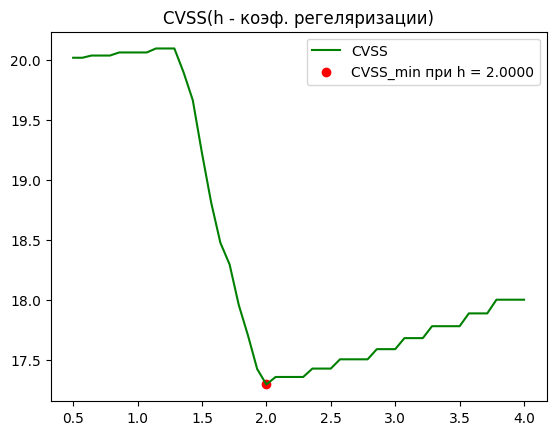

In [554]:
CVSS_min = np.min(CVSS)
h_min = H[np.where(CVSS == CVSS_min)]
plt.figure()
plt.title('CVSS(h - коэф. регeляризации)')
plt.plot(H,CVSS, color = 'g', label = 'CVSS')
plt.scatter(np.array(h_min), CVSS_min, color = 'r', label = f'CVSS_min при h = {float(h_min):.4f}')
plt.legend()

In [555]:
print(a_opt, b_opt)
CVSS_min = np.min(CVSS)
h_min = H[np.where(CVSS == CVSS_min)]
print(h_min)
L_min = np.inf
for a in A:
    for b in B:
        L = (a * psi[:,0][:,np.newaxis] + b * psi[:,1][:,np.newaxis] - Y).T @ (a * psi[:,0][:,np.newaxis] + b * psi[:,1][:,np.newaxis] - Y) + h_min * (np.abs(a) + np.abs(b))
        if L_min > L:   
            L_min = L
            a_opt = a
            b_opt = b
            h_min = h

0.030303030303030276 1.0
[2.]


In [556]:
beta = np.array([[a_opt],[b_opt]])
print(beta)

[[0.03030303]
 [2.49494949]]


In [557]:
print(f"𝜔 = {beta[0,0]:.2f}𝜉 + {beta[1,0]:.2f}𝜂 - уравнение lasso регрессии") 

𝜔 = 0.03𝜉 + 2.49𝜂 - уравнение lasso регрессии
